<a href="https://colab.research.google.com/github/jainrasik/Credit-Card-Default-Prediction-Rasik-Jain/blob/main/Credit_Card_Default_Prediction_Rasik_jain_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Credit Card Default Prediction-Rasik Jain/default of credit card clients.xls')

In [5]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
df.shape

(30001, 25)

In [7]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
columns_names=df.iloc[0,:]
corrected_column_names=dict(zip(df.columns,columns_names))
df.rename(corrected_column_names,axis=1,inplace=True)
df.drop(0,axis=0,inplace=True)

In [9]:
df.shape

(30000, 25)

In [10]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [34]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
df.drop('ID',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

In [14]:
df=df.apply(lambda x: pd.to_numeric(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [15]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [16]:
df.duplicated().sum()

35

In [17]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [33]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [35]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [18]:
var=[]
for i,col in enumerate(df.columns):
 var.append(df[col].value_counts().shape[0])
num_cat_sep=pd.DataFrame({'columns':df.columns,'Unique_counts':var})
categorical_variable=num_cat_sep[num_cat_sep['Unique_counts']<15]['columns']
numerical_variables=num_cat_sep[num_cat_sep['Unique_counts']>15]['columns']

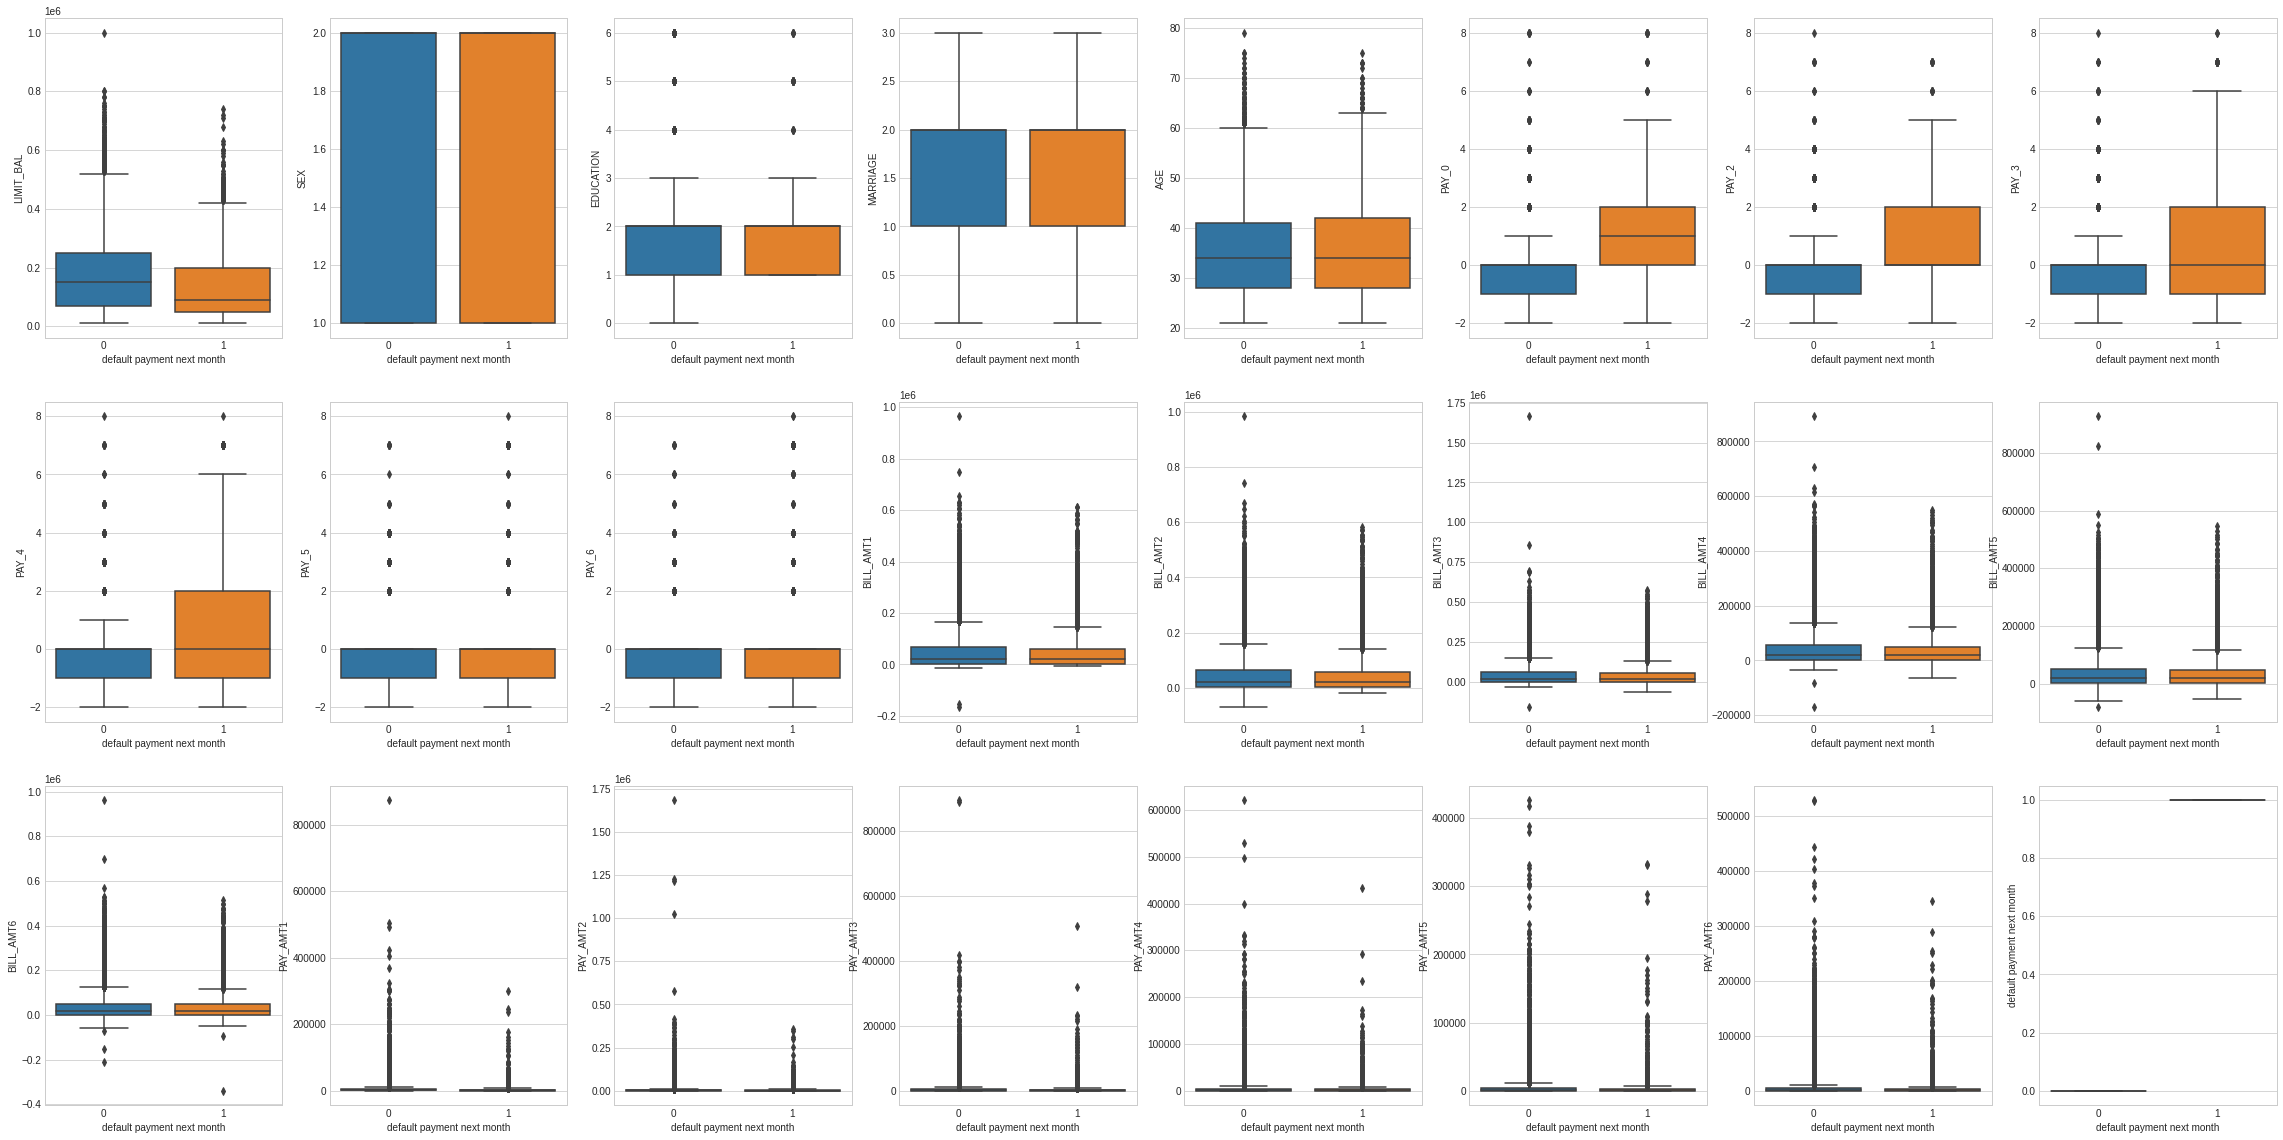

In [19]:
plt.figure(figsize=[40,20])
for i,col in enumerate(df.columns):
 plt.subplot(3,8,i+1)
 sns.boxplot(data=df,y=col,x='default payment next month')
plt.show()

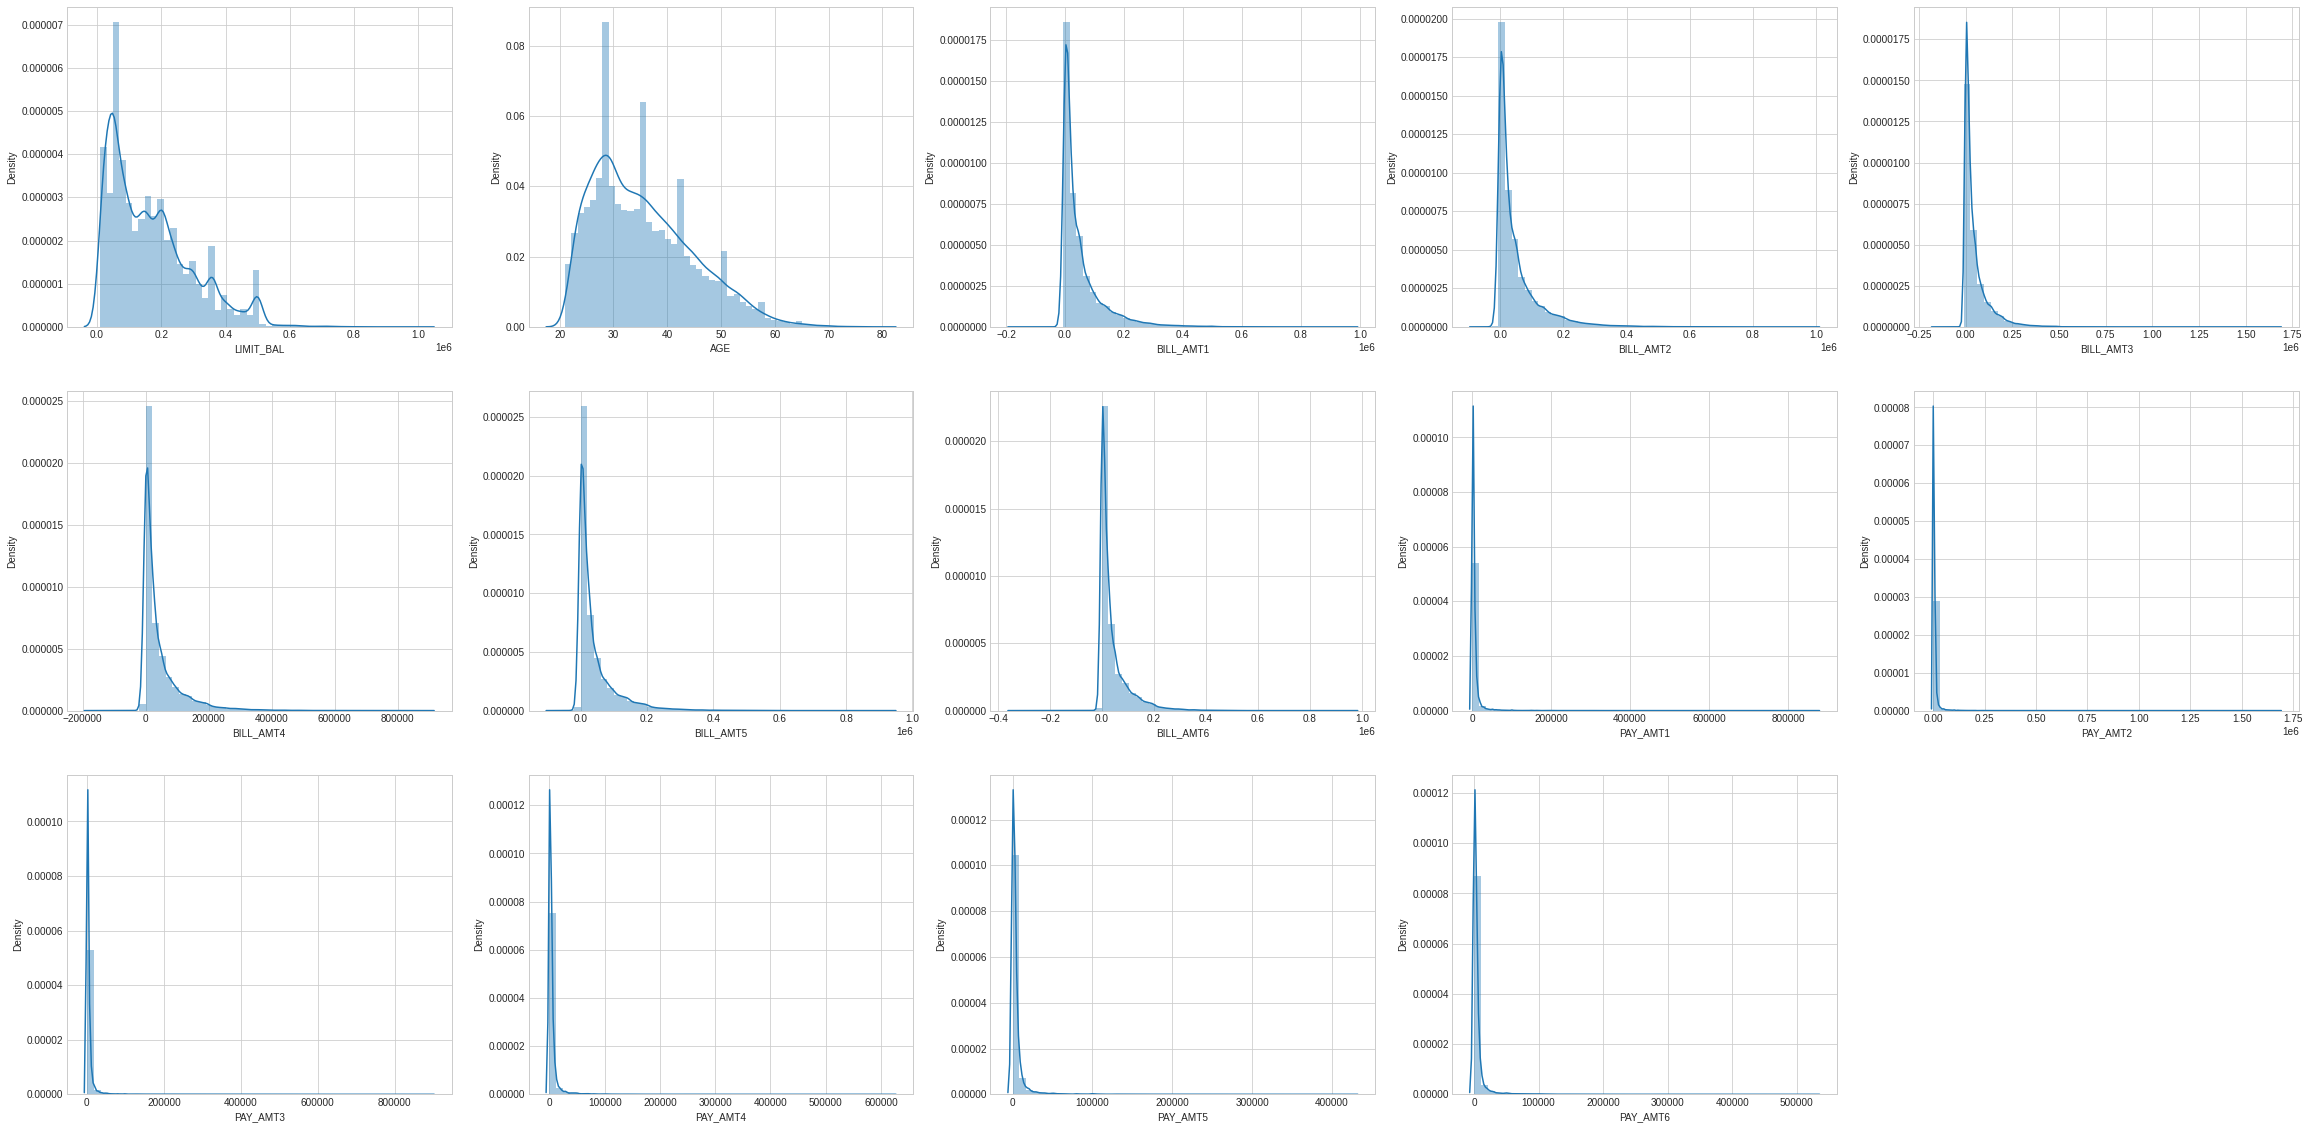

In [20]:
plt.figure(figsize=[40,20])
for i,col in enumerate(numerical_variables):
 plt.subplot(3,5,i+1)
 sns.distplot(df[col])
 plt.ticklabel_format(style='plain', axis='y')
plt.show()

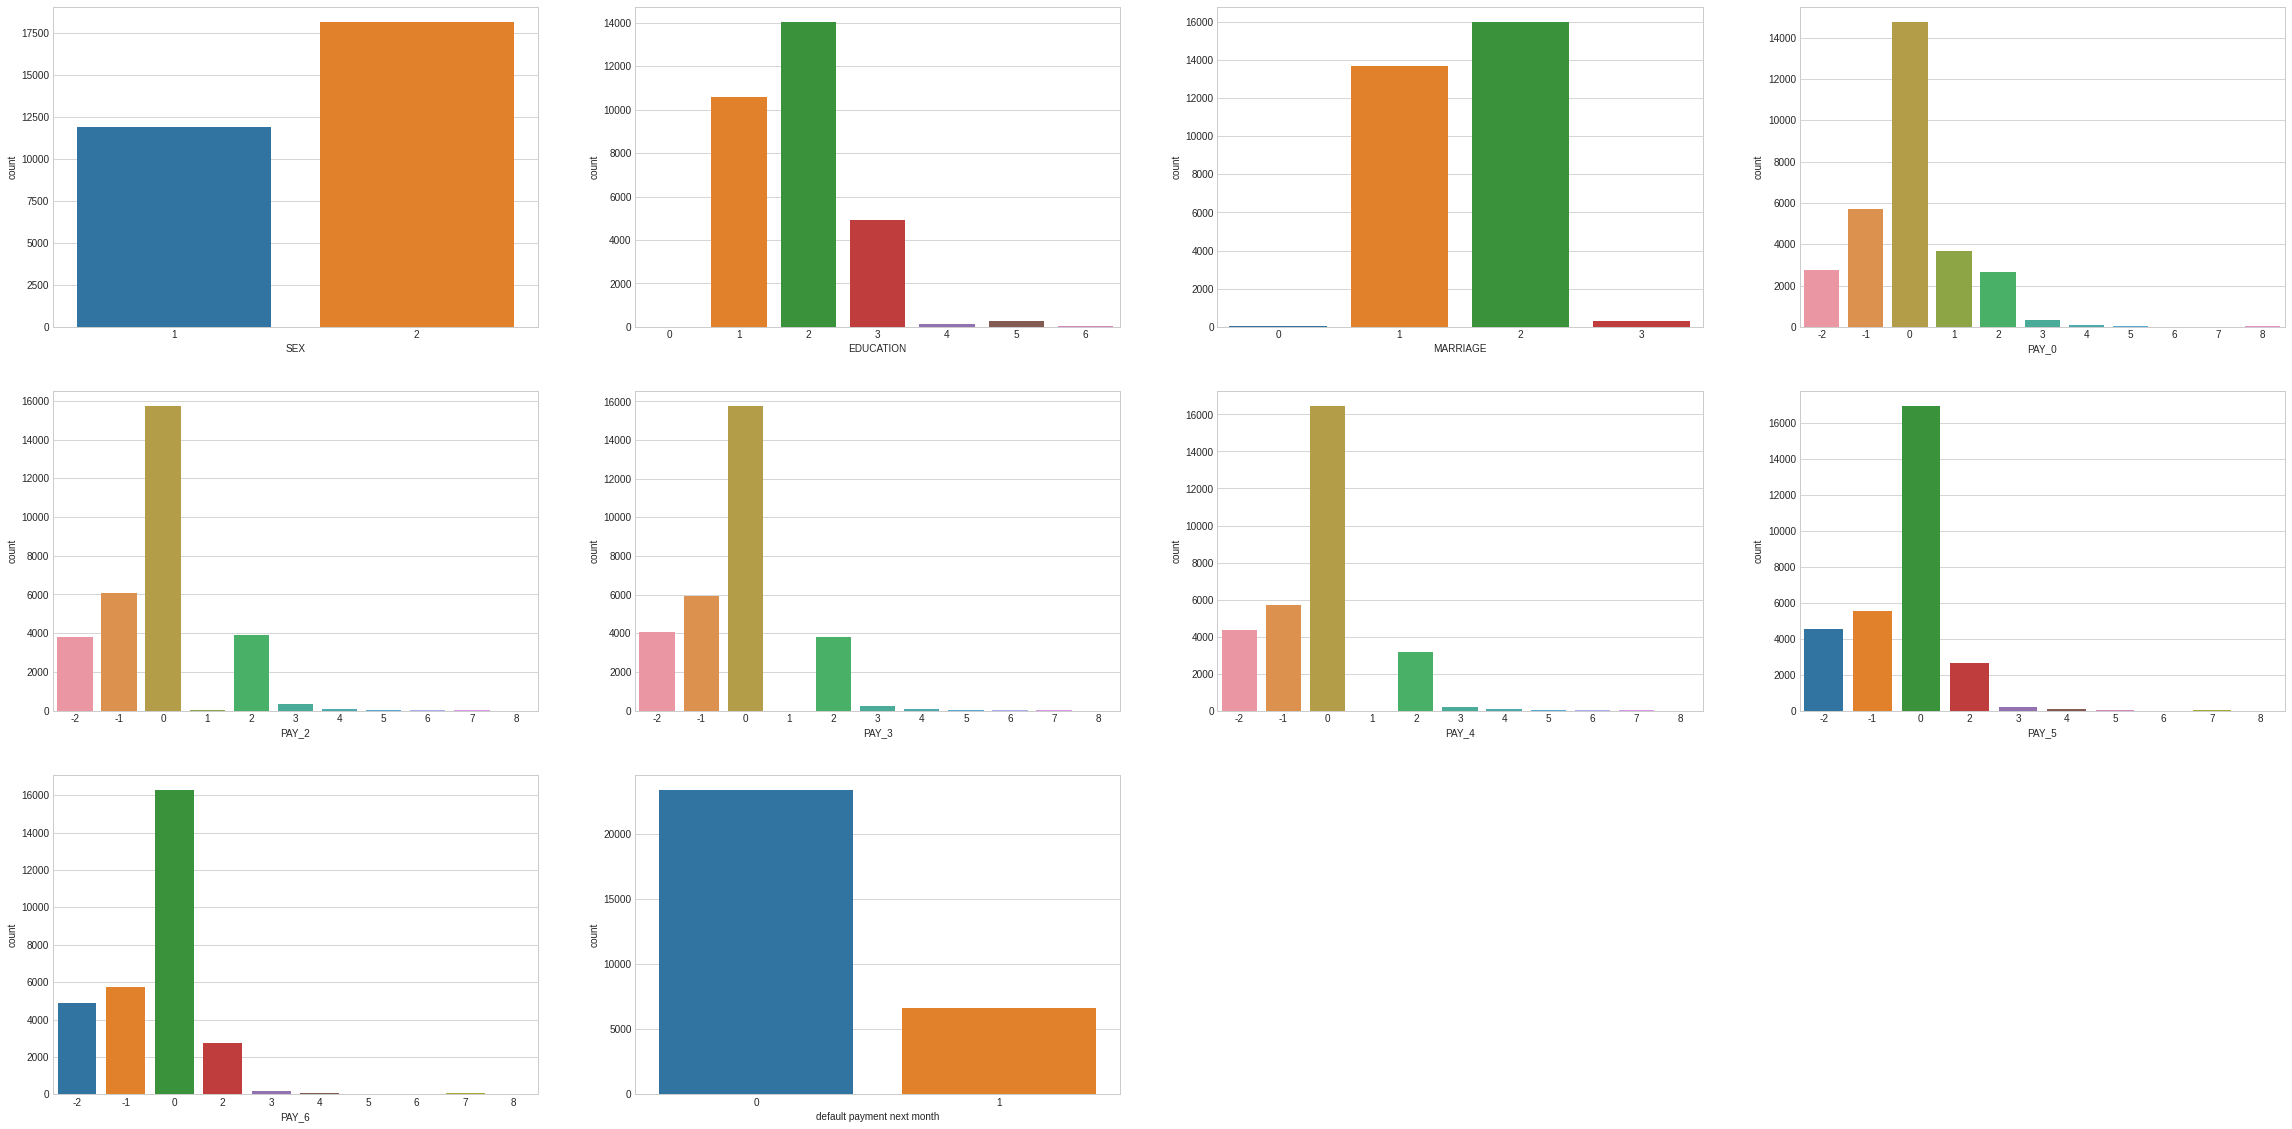

In [21]:
plt.figure(figsize=[40,20])
for i,col in enumerate(categorical_variable):
 plt.subplot(3,4,i+1)
 sns.countplot(x=col,data=df)
plt.show()

In [22]:
X=df[set(df.columns)-{'default payment next month'}]
y=df[{'default payment next month'}]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(24000, 23)
(6000, 23)


In [98]:
def eval_metric(X_train,y_train,X_test,y_test,model,optimal=0):
  if optimal==1:
    clf=model
  else:
    clf=model()
  clf.fit(X_train,y_train)
  y_prob_train=clf.predict_proba(X_train)[:,1]
  y_prob_test=clf.predict_proba(X_test)[:,1]
  y_pred_train=clf.predict(X_train)
  y_pred_test=clf.predict(X_test)
  plt.figure(figsize=[25,5])
  ax=plt.subplot(1,3,1)
  labels = ['Credible', 'Defaulter']
  cm=confusion_matrix(y_train,y_pred_train)
  sns.heatmap(data=cm,annot=True,cmap='YlGnBu',fmt='g')
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix Train')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  ax=plt.subplot(1,3,2)
  labels = ['Credible', 'Defaulter']
  cm=confusion_matrix(y_test,y_pred_test)
  sns.heatmap(data=cm,annot=True,cmap='YlGnBu',fmt='g')
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix Test')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  dictionary={'Train:' : [round(accuracy_score(y_train,y_pred_train),2),precision_score(y_train,y_pred_train), recall_score(y_train,y_pred_train)],
              'Test:' : [round(accuracy_score(y_test,y_pred_test),2),precision_score(y_test,y_pred_test),recall_score(y_test,y_pred_test)]}
  temp=pd.DataFrame(dictionary,index=['accuracy','precision','recall'])
  fpr, tpr, threshold=roc_curve(y_test,y_prob_test)
  ax=plt.subplot(1,3,3)
  plt.title('Receiver Operating Characteristic')
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  return temp

In [38]:
models=[RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier]

RandomForestClassifier'


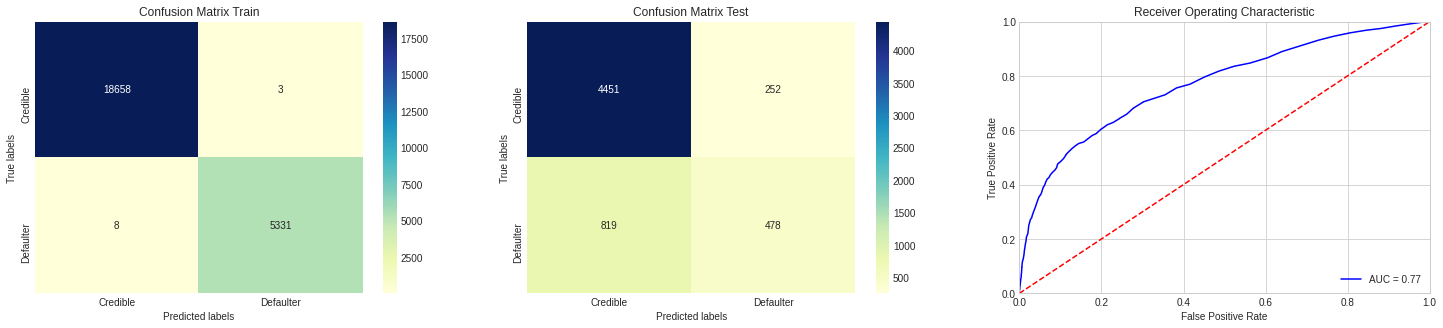

,Train:,Test:
RandomForestClassifier',,
accuracy,1.000000,0.820000
precision,0.999438,0.654795
recall,0.998502,0.368543


AdaBoostClassifier'


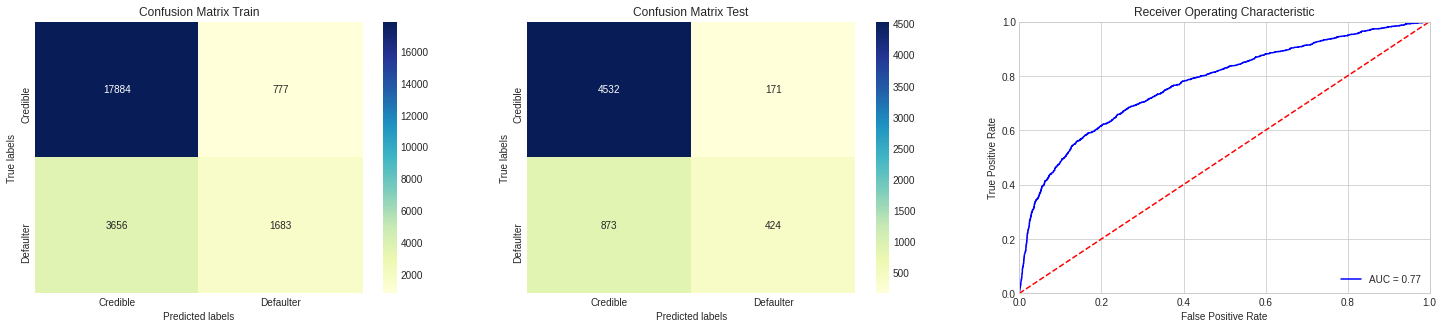

,Train:,Test:
AdaBoostClassifier',,
accuracy,0.820000,0.830000
precision,0.684146,0.712605
recall,0.315228,0.326908


BaggingClassifier'


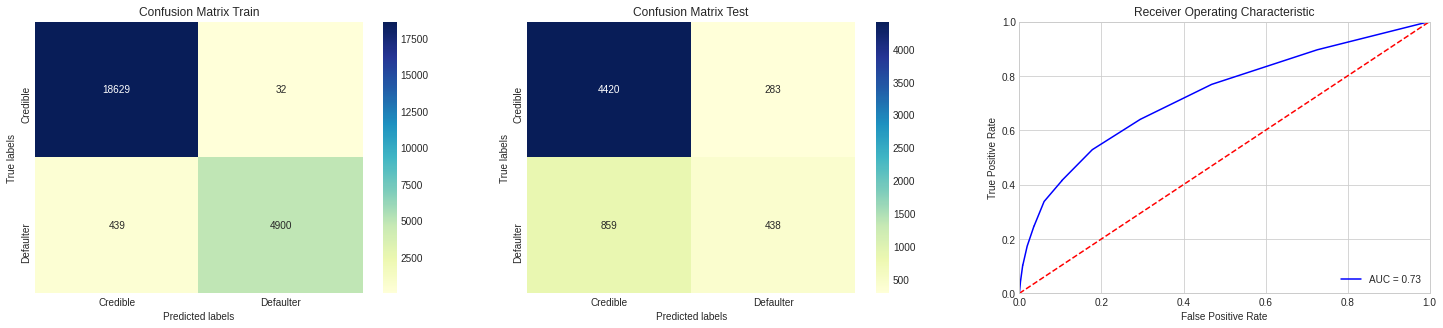

,Train:,Test:
BaggingClassifier',,
accuracy,0.980000,0.810000
precision,0.993512,0.607490
recall,0.917775,0.337702


ExtraTreesClassifier'


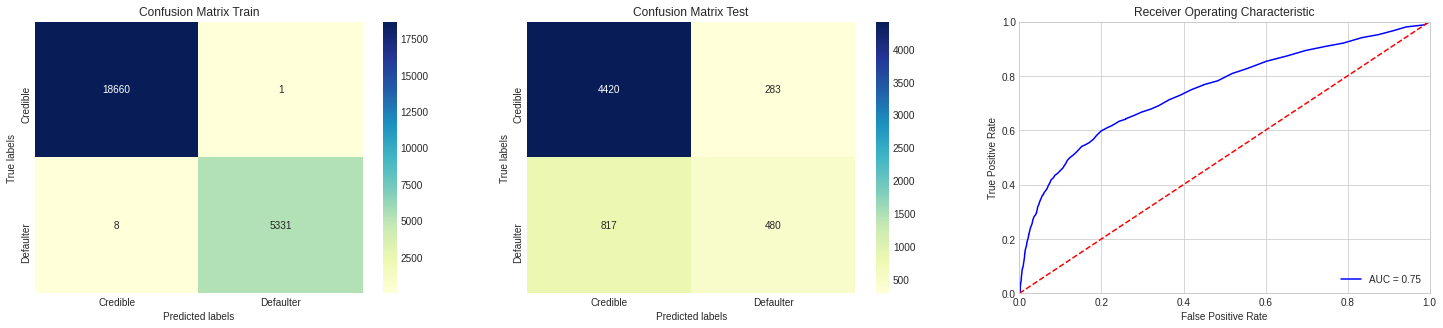

,Train:,Test:
ExtraTreesClassifier',,
accuracy,1.000000,0.820000
precision,0.999812,0.629096
recall,0.998502,0.370085


GradientBoostingClassifier'


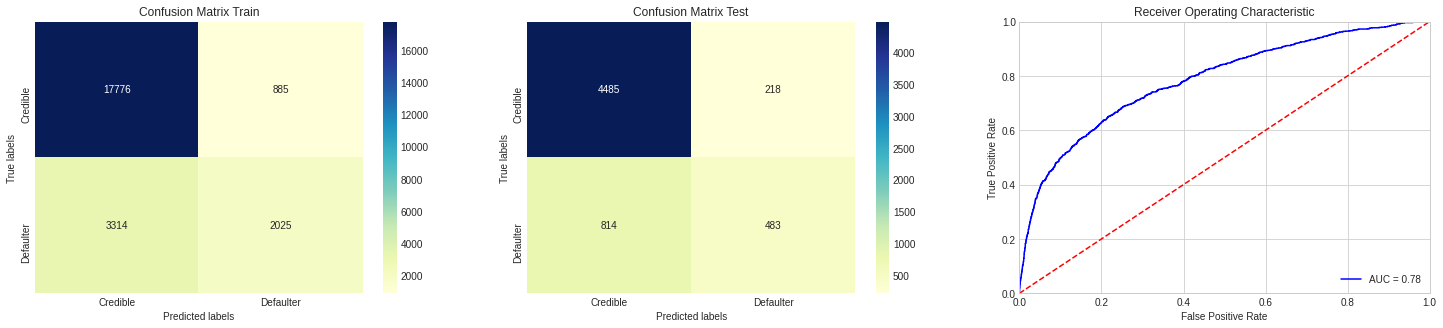

,Train:,Test:
GradientBoostingClassifier',,
accuracy,0.830000,0.830000
precision,0.695876,0.689016
recall,0.379285,0.372398


XGBClassifier'


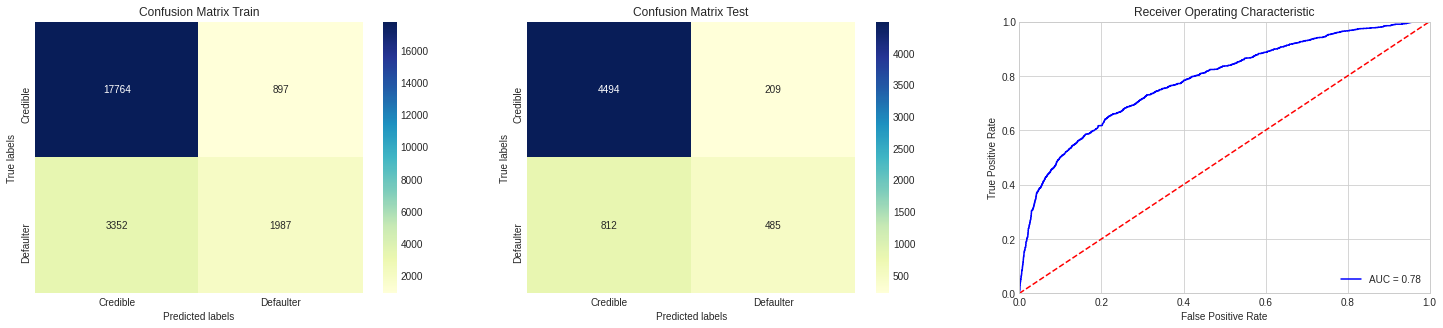

,Train:,Test:
XGBClassifier',,
accuracy,0.820000,0.830000
precision,0.688974,0.698847
recall,0.372167,0.373940


LGBMClassifier'


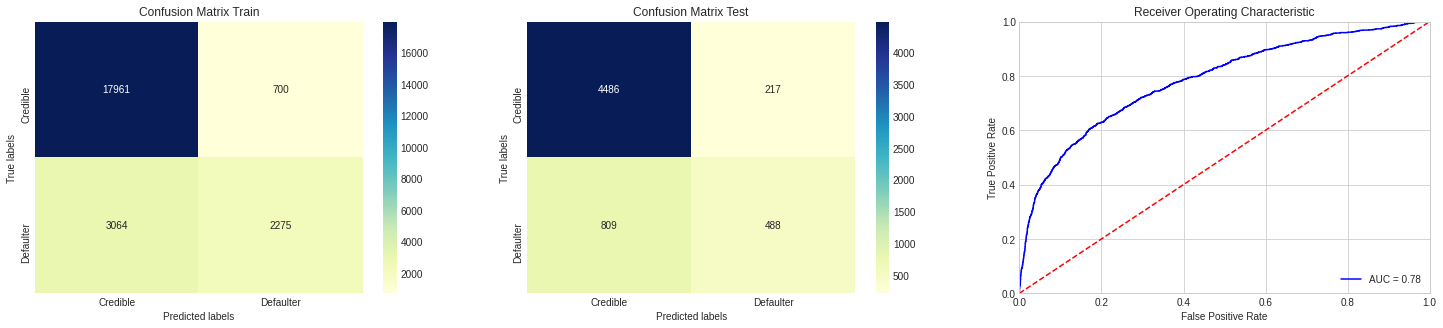

,Train:,Test:
LGBMClassifier',,
accuracy,0.840000,0.830000
precision,0.764706,0.692199
recall,0.426110,0.376253


In [109]:
for model in models:
 print(str(model).split('.')[-1].split('>')[0])
 temp=eval_metric(X_train,y_train,X_test,y_test,model)
 temp.index.name=str(model).split('.')[-1].split('>')[0]
 display(temp)

In [76]:
for model in models:
  score=cross_validate(model(),X_train,y_train,cv=5,scoring=['accuracy','precision','recall'],return_train_score=True)
  temp=pd.DataFrame(score).drop(['fit_time','score_time'],axis=1)
  temp.index.name=str(model).split('.')[-1].split('>')[0]
  display(temp)

,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
RandomForestClassifier',,,,,,
0,0.812083,0.999687,0.645503,0.999532,0.343018,0.999064
1,0.824375,0.999687,0.673344,0.999298,0.409176,0.999298
2,0.813542,0.999687,0.646362,0.999766,0.357678,0.998829
3,0.811458,0.999531,0.631664,0.998596,0.366105,0.999298
4,0.812917,0.999687,0.641667,0.999064,0.360487,0.999532


,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
AdaBoostClassifier',,,,,,
0,0.811042,0.817344,0.670940,0.692115,0.294283,0.322566
1,0.816458,0.815052,0.682975,0.680000,0.326779,0.318427
2,0.812500,0.816354,0.668000,0.687847,0.312734,0.319363
3,0.815417,0.817448,0.669776,0.679307,0.336142,0.339733
4,0.811458,0.817813,0.661386,0.689554,0.312734,0.329197


,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
BaggingClassifier',,,,,,
0,0.808542,0.981615,0.633094,0.995950,0.329897,0.921114
1,0.806875,0.980260,0.609642,0.994411,0.367041,0.916413
2,0.795833,0.979479,0.574324,0.995653,0.318352,0.911730
3,0.801042,0.979010,0.594324,0.995389,0.333333,0.909857
4,0.806667,0.981302,0.616279,0.994439,0.347378,0.921096


,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
ExtraTreesClassifier',,,,,,
0,0.809583,0.999687,0.625616,1.000000,0.357076,0.998596
1,0.817083,0.999687,0.644817,0.999766,0.396067,0.998829
2,0.811875,0.999687,0.633279,1.000000,0.367041,0.998595
3,0.804583,0.999583,0.602201,0.999766,0.358614,0.998361
4,0.810000,0.999687,0.621875,0.999766,0.372659,0.998829


,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
GradientBoostingClassifier',,,,,,
0,0.818125,0.825208,0.669580,0.695559,0.358950,0.381320
1,0.825208,0.825573,0.686179,0.699913,0.395131,0.377897
2,0.819375,0.825625,0.677249,0.696970,0.359551,0.382346
3,0.816042,0.826146,0.660312,0.700991,0.356742,0.380941
4,0.814167,0.826302,0.650171,0.699829,0.356742,0.383751


,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
XGBClassifier',,,,,,
0,0.817917,0.823646,0.671403,0.691443,0.354264,0.374532
1,0.826042,0.824010,0.689431,0.696649,0.397004,0.369937
2,0.819375,0.824063,0.676007,0.691549,0.361423,0.377429
3,0.816667,0.824531,0.666078,0.695238,0.352996,0.376024
4,0.816875,0.824844,0.666081,0.695690,0.354869,0.377897


,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
LGBMClassifier',,,,,,
0,0.819792,0.848333,0.678445,0.784281,0.359888,0.439139
1,0.822292,0.847083,0.671451,0.778706,0.394195,0.436666
2,0.815000,0.849583,0.652542,0.790180,0.360487,0.440880
3,0.819583,0.847760,0.672355,0.775102,0.368914,0.444627
4,0.818750,0.848958,0.666667,0.783382,0.370787,0.443690


In [81]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [90]:
n_estimators = [20,50,100] 
max_depth=[4,8]
min_samples_leaf=[40,50]
min_samples_split=[50,100]
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

RandomForestClassifier'


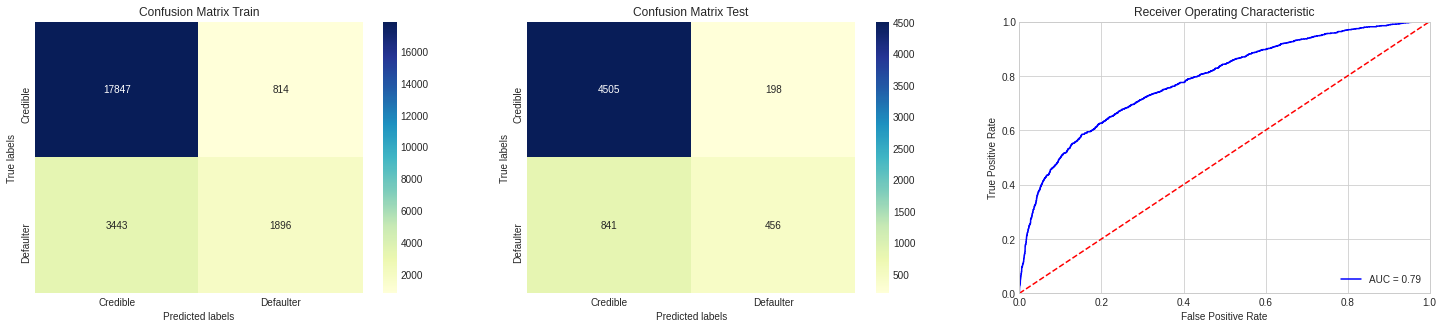

,Train:,Test:
RandomForestClassifier',,
accuracy,0.820000,0.830000
precision,0.699631,0.697248
recall,0.355123,0.351581


ExtraTreesClassifier'


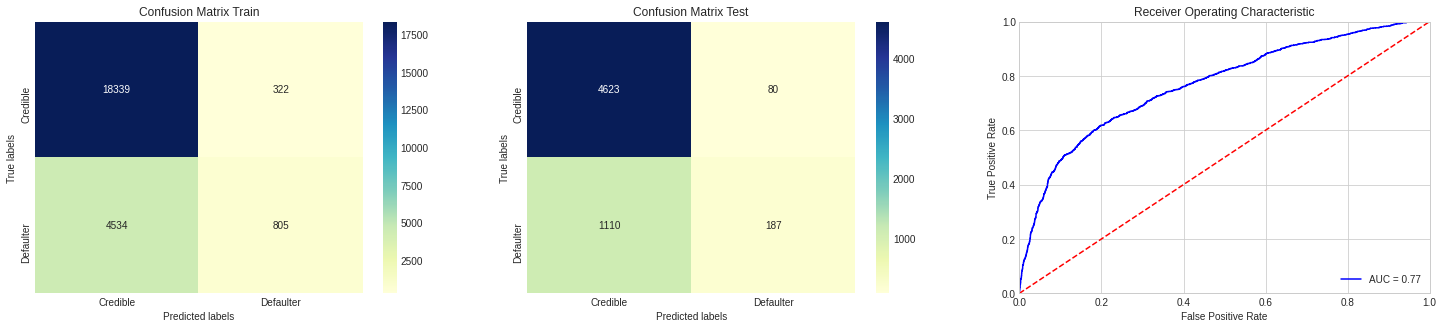

,Train:,Test:
ExtraTreesClassifier',,
accuracy,0.800000,0.800000
precision,0.714286,0.700375
recall,0.150777,0.144179


GradientBoostingClassifier'


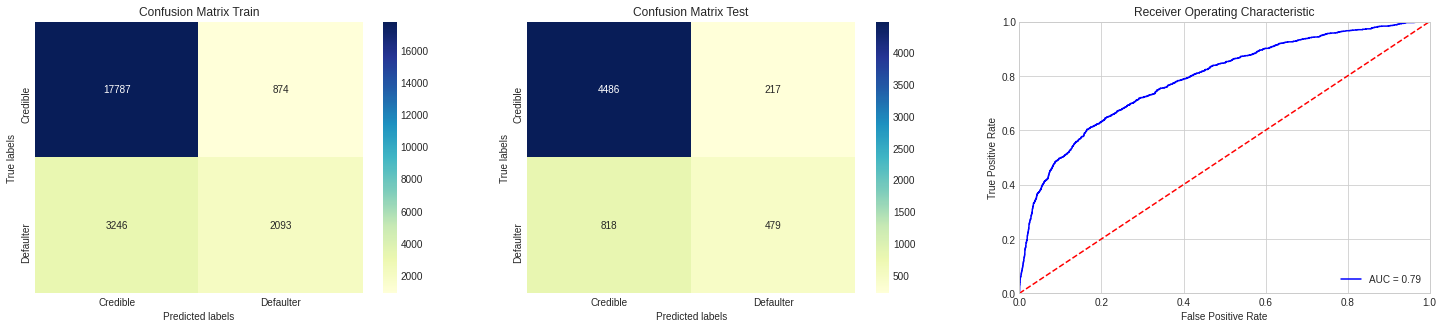

,Train:,Test:
GradientBoostingClassifier',,
accuracy,0.830000,0.830000
precision,0.705426,0.688218
recall,0.392021,0.369314


XGBClassifier'


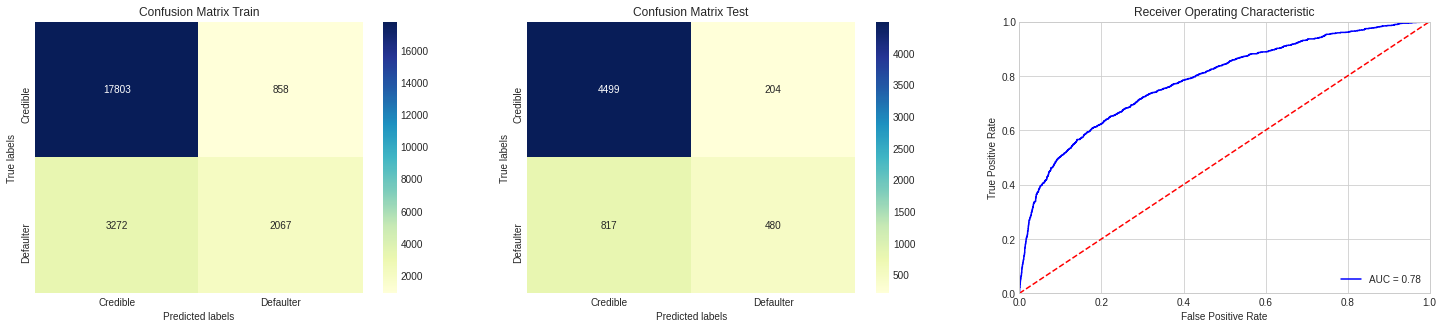

,Train:,Test:
XGBClassifier',,
accuracy,0.830000,0.830000
precision,0.706667,0.701754
recall,0.387151,0.370085


LGBMClassifier'


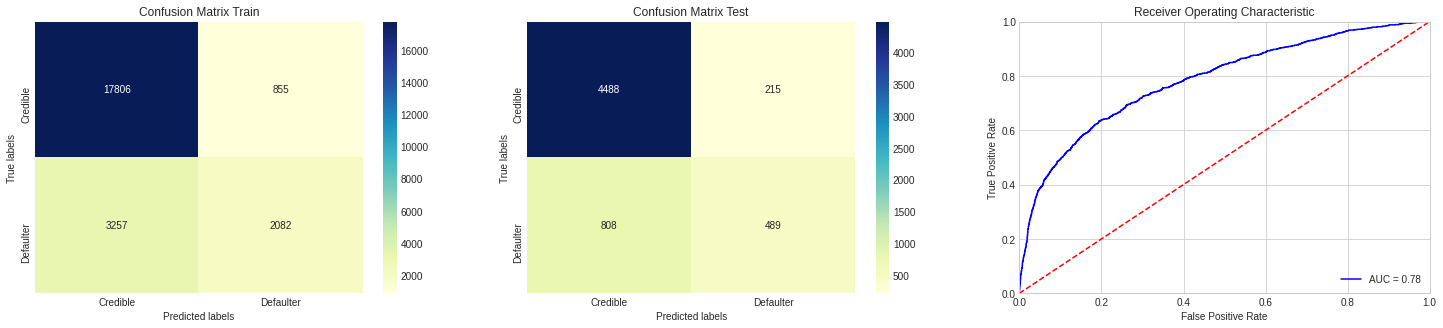

,Train:,Test:
LGBMClassifier',,
accuracy,0.830000,0.830000
precision,0.708887,0.694602
recall,0.389961,0.377024


In [122]:
models=[RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier]
for model in models:
 print(str(model).split('.')[-1].split('>')[0])
 GS=GridSearchCV(model(),param_dict,scoring='roc_auc',cv=5,n_jobs=-1)
 GS.fit(X_train,y_train)
 opt_model=GS.best_estimator_
 temp=eval_metric(X_train,y_train,X_test,y_test,opt_model,optimal=1)
 temp.index.name=str(model).split('.')[-1].split('>')[0]
 display(temp)

RandomForestClassifier'


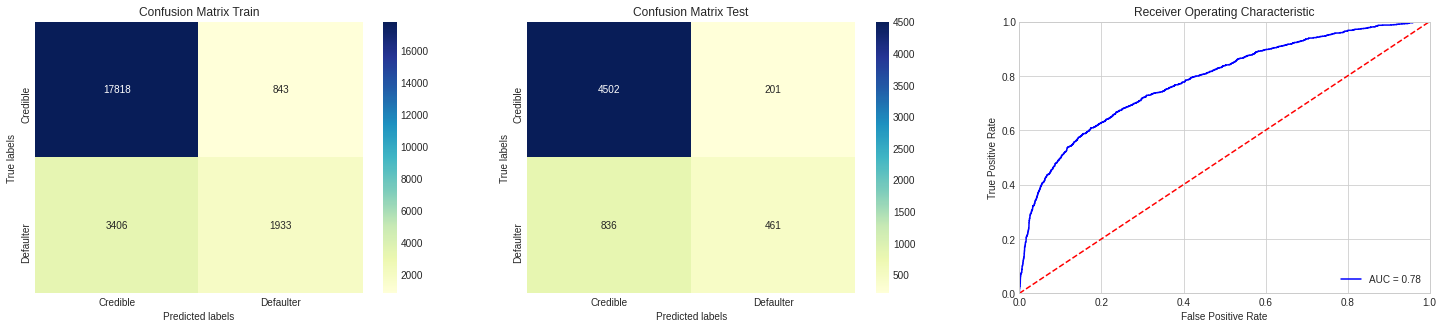

,Train:,Test:
RandomForestClassifier',,
accuracy,0.820000,0.830000
precision,0.696326,0.696375
recall,0.362053,0.355436


ExtraTreesClassifier'


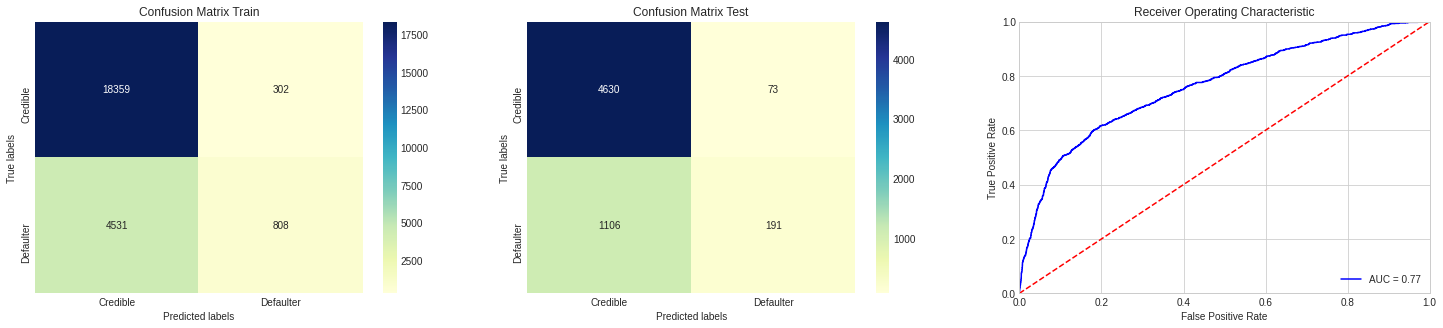

,Train:,Test:
ExtraTreesClassifier',,
accuracy,0.800000,0.800000
precision,0.727928,0.723485
recall,0.151339,0.147263


GradientBoostingClassifier'


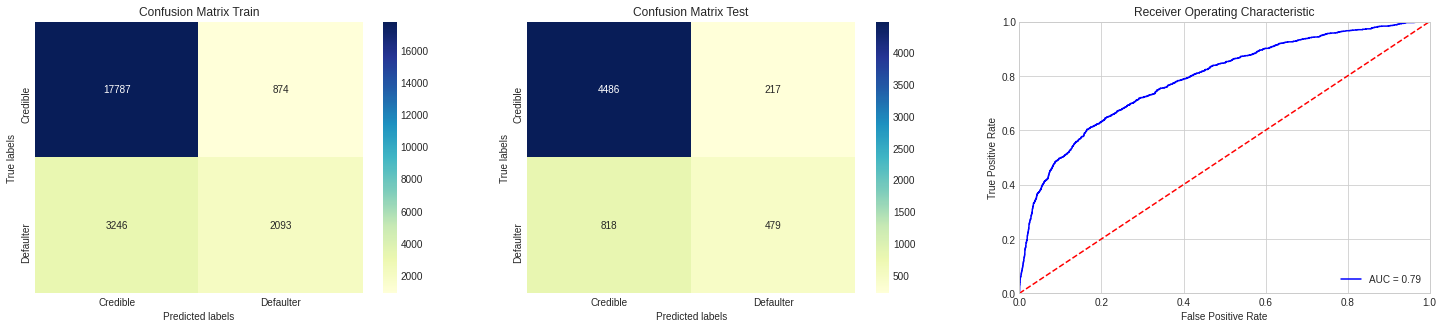

,Train:,Test:
GradientBoostingClassifier',,
accuracy,0.830000,0.830000
precision,0.705426,0.688218
recall,0.392021,0.369314


XGBClassifier'


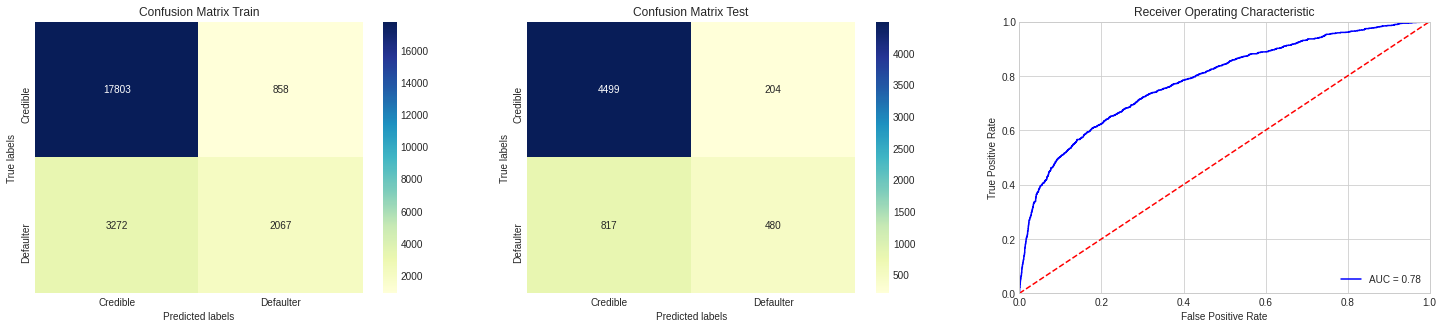

,Train:,Test:
XGBClassifier',,
accuracy,0.830000,0.830000
precision,0.706667,0.701754
recall,0.387151,0.370085


LGBMClassifier'


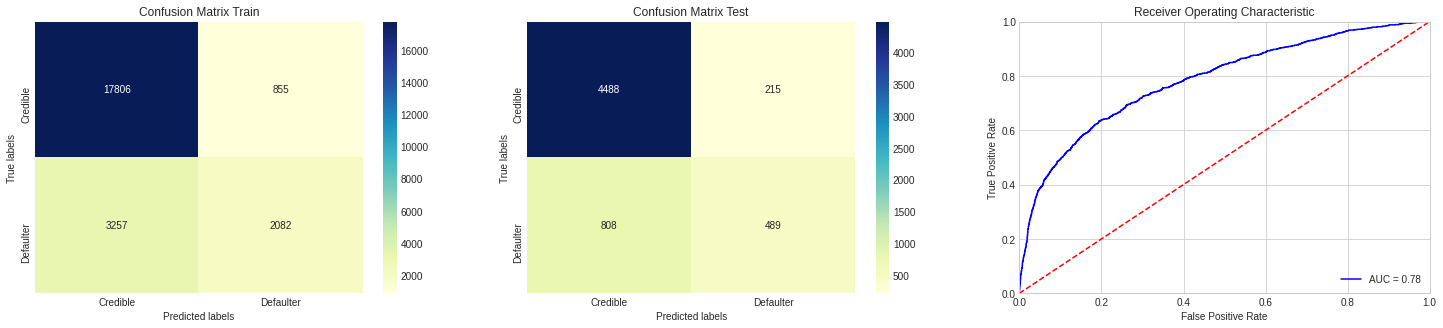

,Train:,Test:
LGBMClassifier',,
accuracy,0.830000,0.830000
precision,0.708887,0.694602
recall,0.389961,0.377024


In [129]:
models=[RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier]
for model in models:
  print(str(model).split('.')[-1].split('>')[0])
  RS=RandomizedSearchCV(model(),param_dict,scoring='roc_auc',cv=5,n_jobs=-1)
  RS.fit(X_train,y_train)
  opt_model=RS.best_estimator_
  temp=eval_metric(X_train,y_train,X_test,y_test,opt_model,optimal=1)
  temp.index.name=str(model).split('.')[-1].split('>')[0]
  display(temp)